In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mass import MassSpectrum
from mass import VanKrevelen
from brutto_generator import brutto_gen

In [14]:
gdf = brutto_gen()

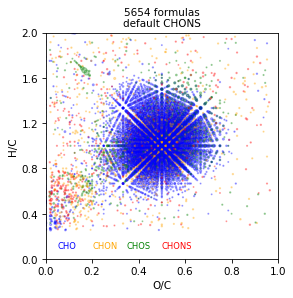

In [15]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=50
                            )
spec = spec.assign(generated_bruttos_table=gdf, elems='CHONS', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(spec.table, name='default CHONS')
vk.draw_scatter(ax=ax)

In [16]:
gdf = brutto_gen(elems={'C':(1,40),'H':(0,100),'O':(0,40),'N':(0,2), 'S':(0,1)})

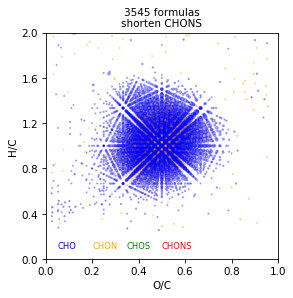

In [17]:
spec = MassSpectrum().load(filename="data/fa.csv",
                            mapper={'m/z':'mass', 'I':'I'},
                            take_columns=['mass','I'],
                            sep=',',
                            treshold=50
                            )
spec = spec.assign(generated_bruttos_table=gdf, elems='CHON', rel_error=0.5)
fig, ax = plt.subplots(figsize=(4, 4), dpi=75)
vk = VanKrevelen(spec.table, name='shorten CHONS')
vk.draw_scatter(ax=ax)